In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Dataset

In [19]:
# Load the dataset
df = pd.read_csv('construction_project_dataset.csv')
df.head()

,timestamp,temperature,humidity,vibration_level,material_usage,machinery_status,worker_count,energy_consumption,task_progress,cost_deviation,time_deviation,safety_incidents,equipment_utilization_rate,material_shortage_alert,risk_score,simulation_deviation,update_frequency,optimization_suggestion,performance_score
0,2023-01-01 00:00:00,24.363503,70.834195,29.038952,162.290510,0,10,394.617852,0.025050,2707.711346,-4.645563,2,84.481661,0,23.181975,0.768037,10,Optimize Material Usage,Excellent
1,2023-01-01 00:01:00,38.767858,49.671023,26.348582,627.127074,1,16,334.086917,0.062199,1866.881543,-0.673013,0,85.115701,0,64.242931,6.958721,15,Optimize Material Usage,Excellent
2,2023-01-01 00:02:00,33.299849,31.727937,17.551847,818.981866,0,17,70.030254,0.141820,-2913.483082,-5.667880,0,82.006109,0,97.199452,8.980785,5,Reallocate Workers,Excellent
3,2023-01-01 00:03:00,29.966462,64.198507,24.660633,788.025785,1,19,275.610928,0.169591,-2778.924736,-8.373158,0,93.410108,1,58.238809,3.295682,5,Reallocate Workers,Excellent
4,2023-01-01 00:04:00,18.900466,45.120688,18.254832,853.656587,0,32,377.220779,0.185736,-2332.484349,-3.455996,0,52.694279,0,19.748945,0.223819,15,Optimize Material Usage,Excellent


In [20]:
print("\n Dataset Info:")
df.info()

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Basic Statistics:")
display(df.describe(include='all').T)


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   50000 non-null  object 
 1   temperature                 50000 non-null  float64
 2   humidity                    50000 non-null  float64
 3   vibration_level             50000 non-null  float64
 4   material_usage              50000 non-null  float64
 5   machinery_status            50000 non-null  int64  
 6   worker_count                50000 non-null  int64  
 7   energy_consumption          50000 non-null  float64
 8   task_progress               50000 non-null  float64
 9   cost_deviation              50000 non-null  float64
 10  time_deviation              50000 non-null  float64
 11  safety_incidents            50000 non-null  int64  
 12  equipment_utilization_rate  50000 non-null  float64
 13  material_shorta

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
timestamp,50000,50000,2023-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,50000.0,NaN,NaN,NaN,27.471585,7.21016,15.000138,21.222747,27.472298,33.707535,39.999304
humidity,50000.0,NaN,NaN,NaN,50.006786,17.296681,20.000506,35.002793,50.140215,65.045492,79.999523
vibration_level,50000.0,NaN,NaN,NaN,25.089912,14.447554,0.000789,12.514142,25.148176,37.603988,49.999469
material_usage,50000.0,NaN,NaN,NaN,550.775799,259.590828,100.004301,326.049586,550.457576,773.80453,999.984686
machinery_status,50000.0,NaN,NaN,NaN,0.70048,0.458052,0.0,0.0,1.0,1.0,1.0
worker_count,50000.0,NaN,NaN,NaN,27.02942,13.014653,5.0,16.0,27.0,38.0,49.0
energy_consumption,50000.0,NaN,NaN,NaN,274.614669,129.756751,50.001002,161.805879,274.034038,386.999642,499.997574
task_progress,50000.0,NaN,NaN,NaN,98.207805,10.788464,0.02505,100.0,100.0,100.0,100.0
cost_deviation,50000.0,NaN,NaN,NaN,-4.539051,2878.850826,-4999.600496,-2481.283865,3.724097,2477.767815,4999.840137


In [21]:
print(df.isnull().sum())

timestamp                     0
temperature                   0
humidity                      0
vibration_level               0
material_usage                0
machinery_status              0
worker_count                  0
energy_consumption            0
task_progress                 0
cost_deviation                0
time_deviation                0
safety_incidents              0
equipment_utilization_rate    0
material_shortage_alert       0
risk_score                    0
simulation_deviation          0
update_frequency              0
optimization_suggestion       0
performance_score             0
dtype: int64


In [64]:
columns = df.columns.tolist()
columns

['timestamp',
 'temperature',
 'humidity',
 'vibration_level',
 'material_usage',
 'machinery_status',
 'worker_count',
 'energy_consumption',
 'task_progress',
 'cost_deviation',
 'time_deviation',
 'safety_incidents',
 'equipment_utilization_rate',
 'material_shortage_alert',
 'risk_score',
 'simulation_deviation',
 'update_frequency',
 'optimization_suggestion',
 'performance_score',
 'date']

In [22]:
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(50000, 19)

In [27]:
df.head()

,timestamp,temperature,humidity,vibration_level,material_usage,machinery_status,worker_count,energy_consumption,task_progress,cost_deviation,time_deviation,safety_incidents,equipment_utilization_rate,material_shortage_alert,risk_score,simulation_deviation,update_frequency,optimization_suggestion,performance_score
0,2023-01-01 00:00:00,24.363503,70.834195,29.038952,162.290510,0,10,394.617852,0.025050,2707.711346,-4.645563,2,84.481661,0,23.181975,0.768037,10,Optimize Material Usage,Excellent
1,2023-01-01 00:01:00,38.767858,49.671023,26.348582,627.127074,1,16,334.086917,0.062199,1866.881543,-0.673013,0,85.115701,0,64.242931,6.958721,15,Optimize Material Usage,Excellent
2,2023-01-01 00:02:00,33.299849,31.727937,17.551847,818.981866,0,17,70.030254,0.141820,-2913.483082,-5.667880,0,82.006109,0,97.199452,8.980785,5,Reallocate Workers,Excellent
3,2023-01-01 00:03:00,29.966462,64.198507,24.660633,788.025785,1,19,275.610928,0.169591,-2778.924736,-8.373158,0,93.410108,1,58.238809,3.295682,5,Reallocate Workers,Excellent
4,2023-01-01 00:04:00,18.900466,45.120688,18.254832,853.656587,0,32,377.220779,0.185736,-2332.484349,-3.455996,0,52.694279,0,19.748945,0.223819,15,Optimize Material Usage,Excellent


⚠️ cost_deviation contains negative values, please check.
⚠️ time_deviation contains negative values, please check.


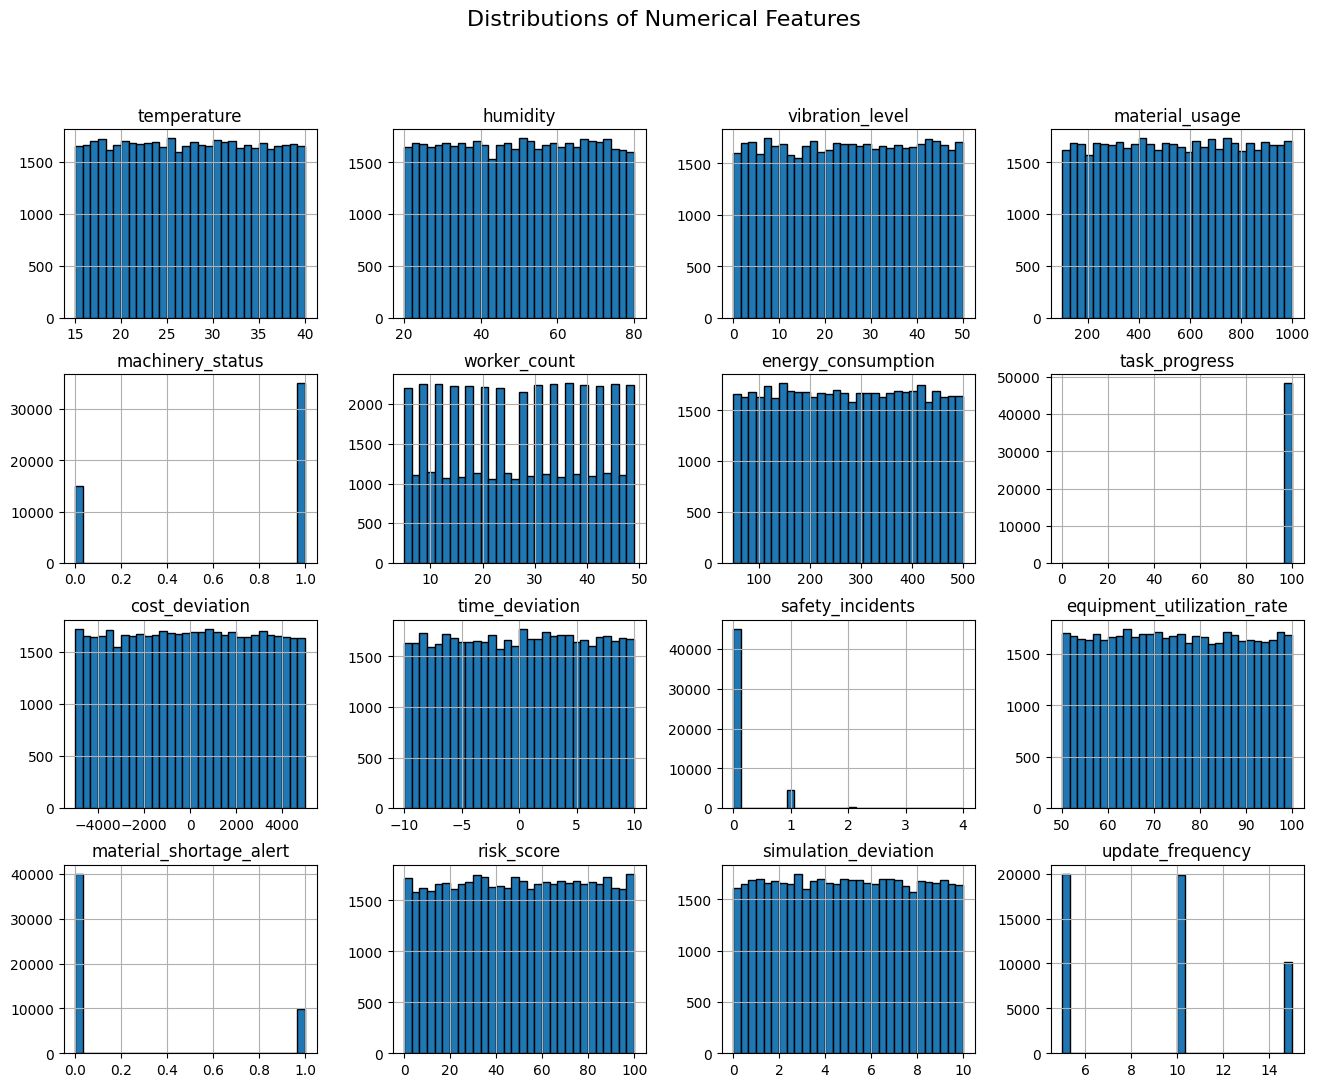

In [ ]:
# Visualize distributions of numerical features
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(bins=30, figsize=(16,12), edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

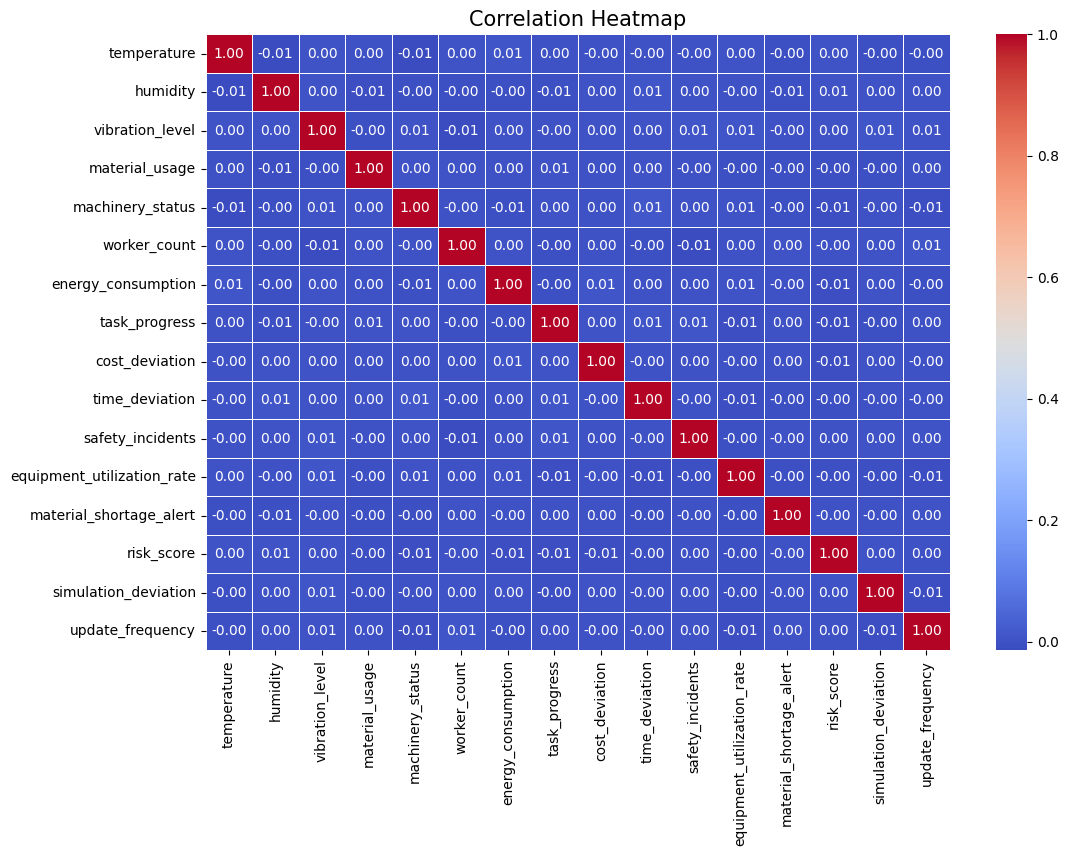

In [33]:
# Correlation heatmap
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=15)
plt.show()

In [36]:
df['performance_score'].unique()

array(['Excellent'], dtype=object)

In [37]:
df['optimization_suggestion'].unique()

array(['Optimize Material Usage', 'Reallocate Workers', 'Adjust Schedule',
       'Increase Machinery'], dtype=object)

<Figure size 1200x1200 with 0 Axes>

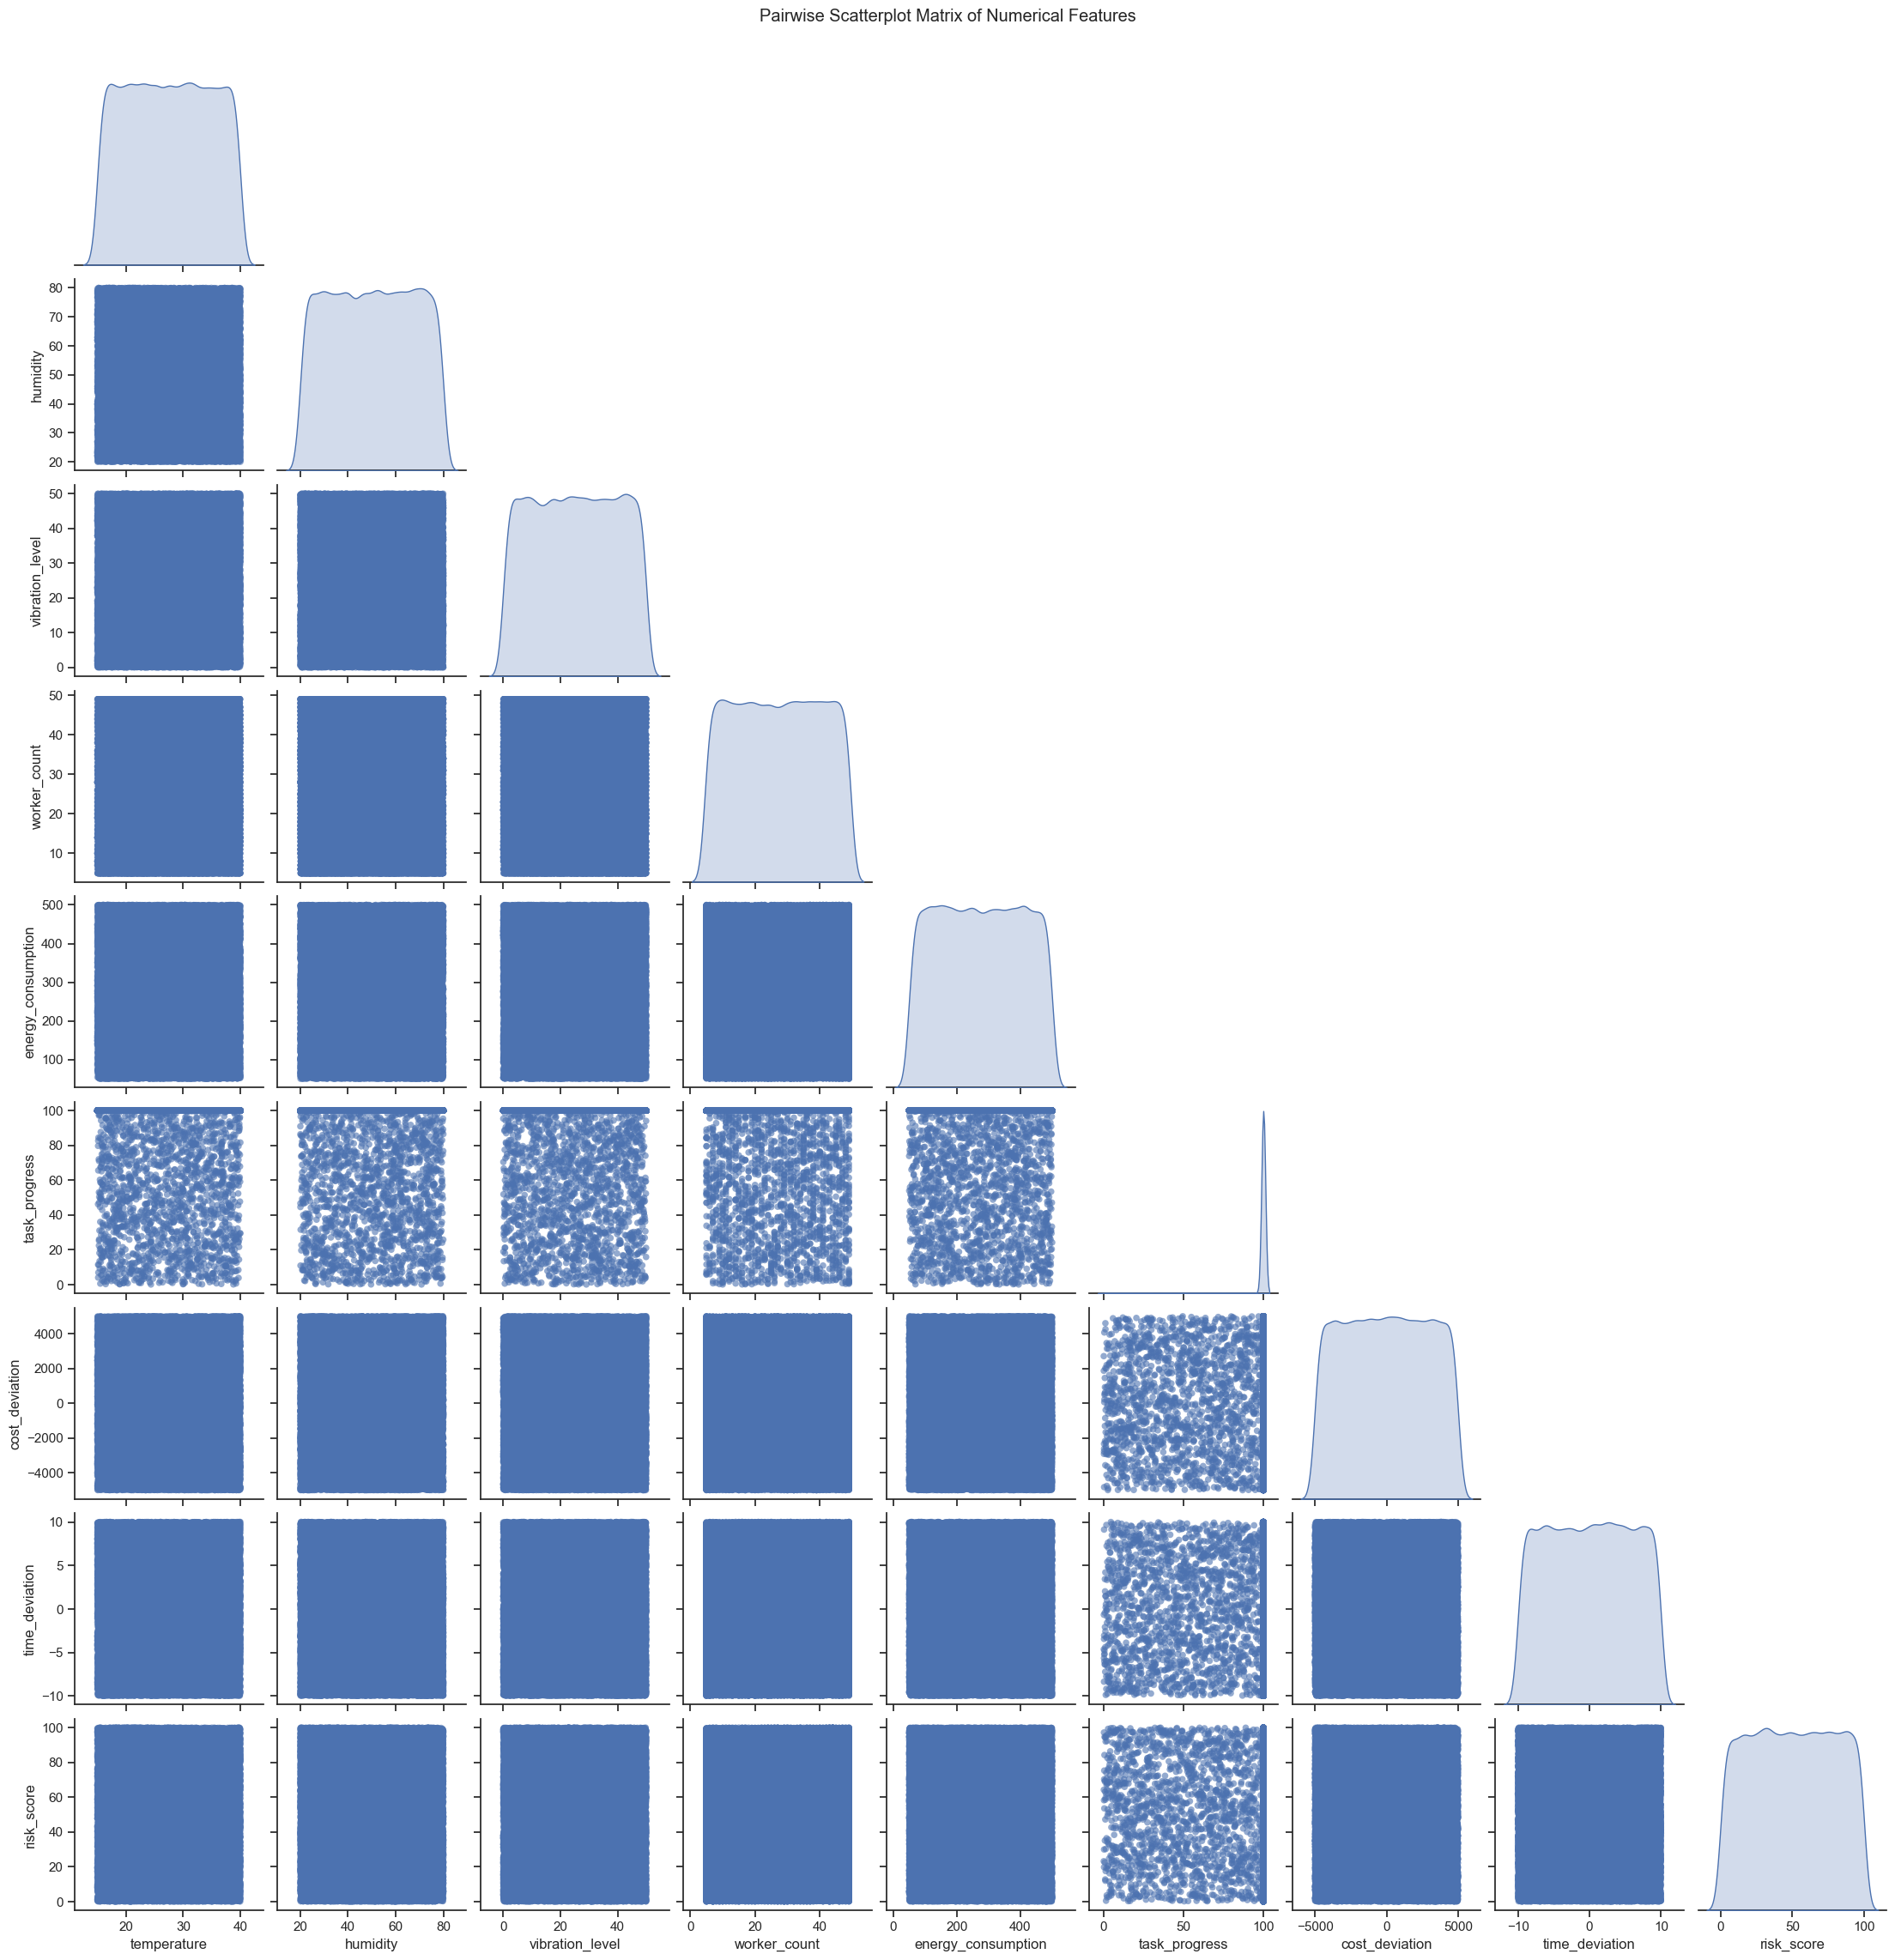

In [39]:
selected_cols = [
    'temperature',
    'humidity',
    'vibration_level',
    'worker_count',
    'energy_consumption',
    'task_progress',
    'cost_deviation',
    'time_deviation',
    'risk_score',
    'performance_score'
]
sns.set(style="ticks", font_scale=1.0)
plt.figure(figsize=(12, 12))
pairplot = sns.pairplot(
    df[selected_cols],
    diag_kind="kde",       
    plot_kws={"alpha": 0.6, "s": 30, "edgecolor": "none"},
    corner=True          
)
pairplot.fig.suptitle("Pairwise Scatterplot Matrix of Numerical Features", y=1.02)
plt.show()

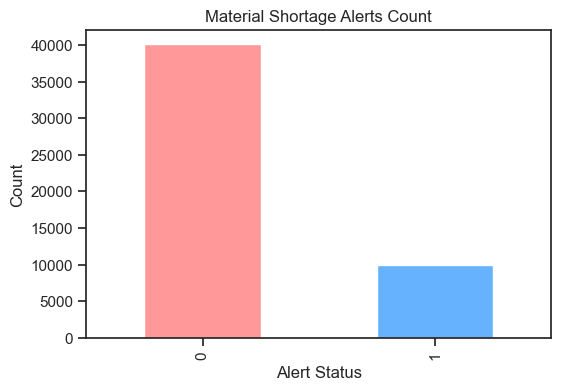

In [41]:
if 'material_shortage_alert' in df.columns:
    plt.figure(figsize=(6,4))
    df['material_shortage_alert'].value_counts().plot(kind='bar', color=['#FF9999','#66B2FF'])
    plt.title("Material Shortage Alerts Count")
    plt.xlabel("Alert Status")
    plt.ylabel("Count")
    plt.show()

<Figure size 1000x500 with 0 Axes>

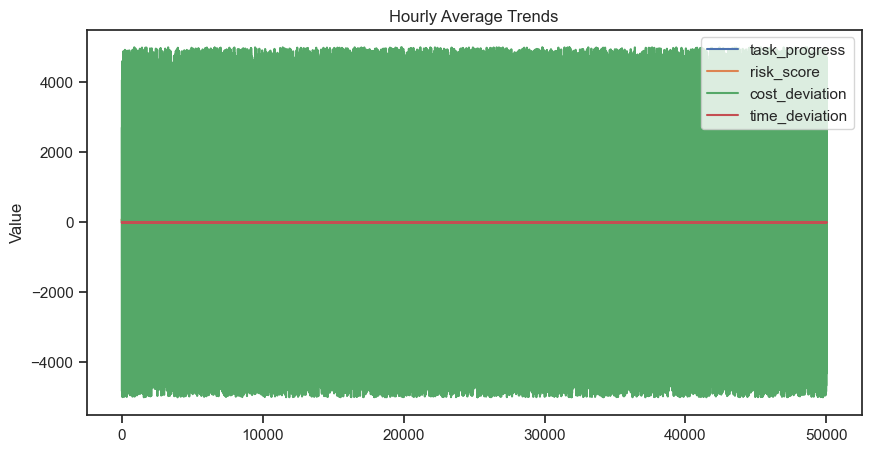

In [51]:
# Hourly time series analysis of key metrics
original = df[['task_progress', 'risk_score', 'cost_deviation', 'time_deviation']]
plt.figure(figsize=(10,5))
original.plot(title='Hourly Average Trends', figsize=(10,5))
plt.ylabel("Value")
plt.show()

C:\Users\Highway\AppData\Local\Temp\ipykernel_18644\3730583678.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df.resample('H', on='timestamp')[['task_progress', 'risk_score', 'cost_deviation', 'time_deviation']].mean()


<Figure size 1000x500 with 0 Axes>

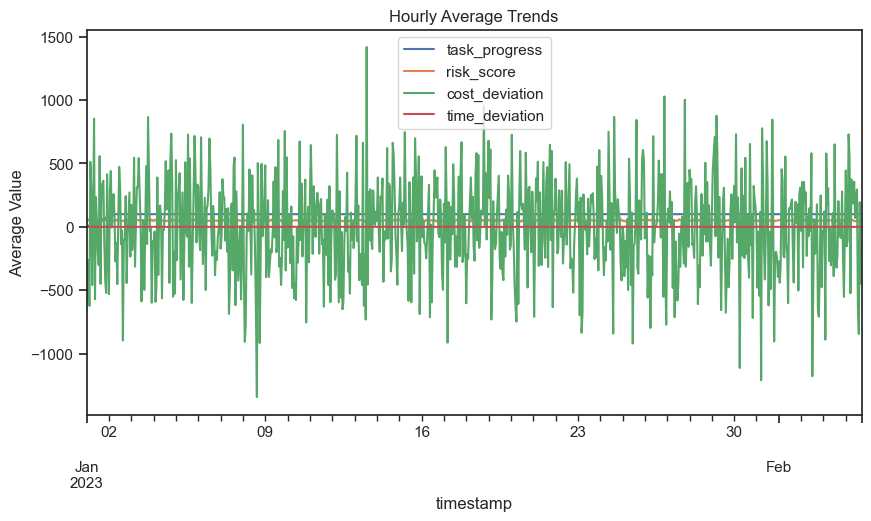

In [ ]:
# Hourly time series analysis of key metrics
hourly = df.resample('H', on='timestamp')[['task_progress', 'risk_score', 'cost_deviation', 'time_deviation']].mean()
plt.figure(figsize=(10,5))
hourly.plot(title='Hourly Average Trends', figsize=(10,5))
plt.ylabel("Average Value")
plt.show()

C:\Users\Highway\AppData\Local\Temp\ipykernel_18644\1789230011.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df.resample('H', on='timestamp')[['time_deviation']].mean()


<Figure size 1000x500 with 0 Axes>

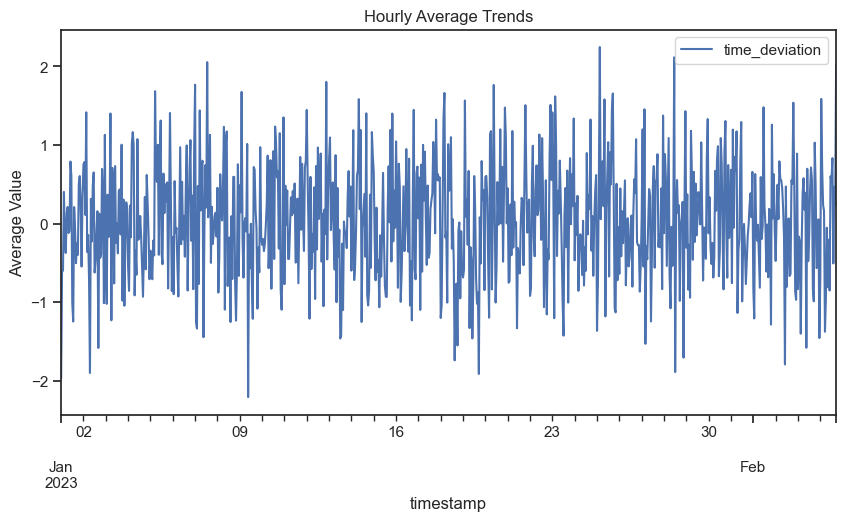

In [53]:
# Hourly time series analysis of time_deviation
hourly = df.resample('H', on='timestamp')[['time_deviation']].mean()
plt.figure(figsize=(10,5))
hourly.plot(title='Hourly Average Trends', figsize=(10,5))
plt.ylabel("Average Value")
plt.show()

<Figure size 1000x500 with 0 Axes>

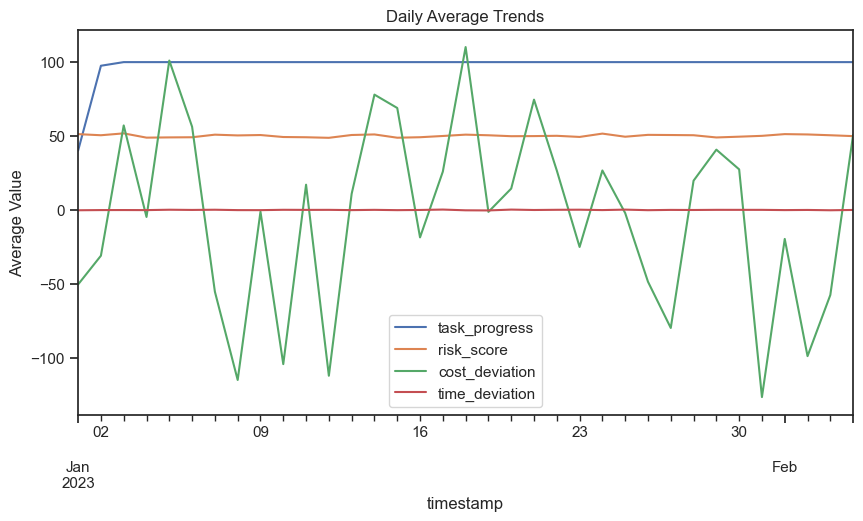

In [ ]:
# Daily time series analysis of key metrics
daily = df.resample('D', on='timestamp')[['task_progress', 'risk_score', 'cost_deviation', 'time_deviation']].mean()
plt.figure(figsize=(10,5))
daily.plot(title='Daily Average Trends', figsize=(10,5))
plt.ylabel("Average Value")
plt.show()

<Figure size 1000x500 with 0 Axes>

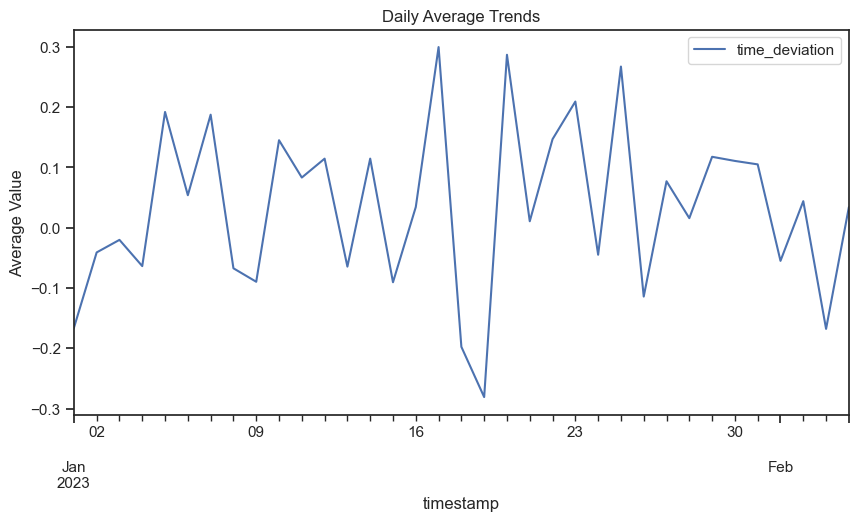

In [55]:
# Daily time series analysis of time_deviation
daily = df.resample('D', on='timestamp')[['time_deviation']].mean()
plt.figure(figsize=(10,5))
daily.plot(title='Daily Average Trends', figsize=(10,5))
plt.ylabel("Average Value")
plt.show()

<Figure size 1000x500 with 0 Axes>

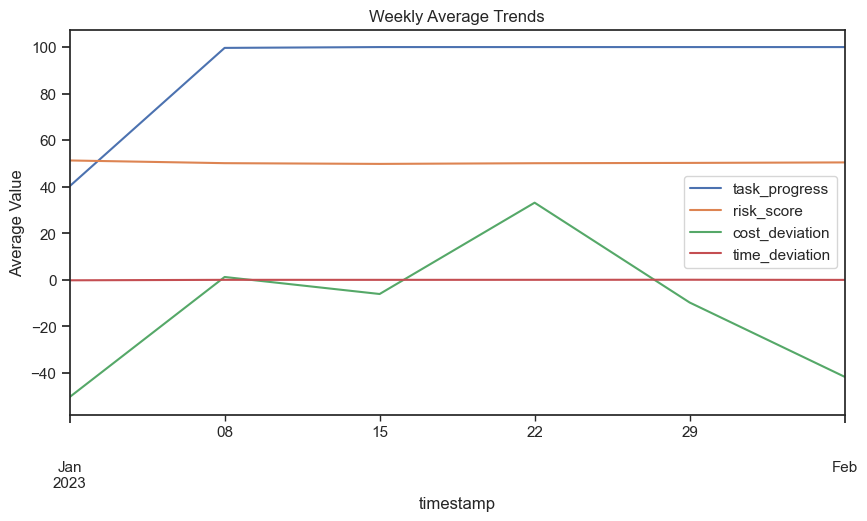

In [ ]:
# Weekly time series analysis of key metrics
weekly = df.resample('W', on='timestamp')[['task_progress', 'risk_score', 'cost_deviation', 'time_deviation']].mean()
plt.figure(figsize=(10,5))
weekly.plot(title='Weekly Average Trends', figsize=(10,5))
plt.ylabel("Average Value")
plt.show()

<Figure size 1000x500 with 0 Axes>

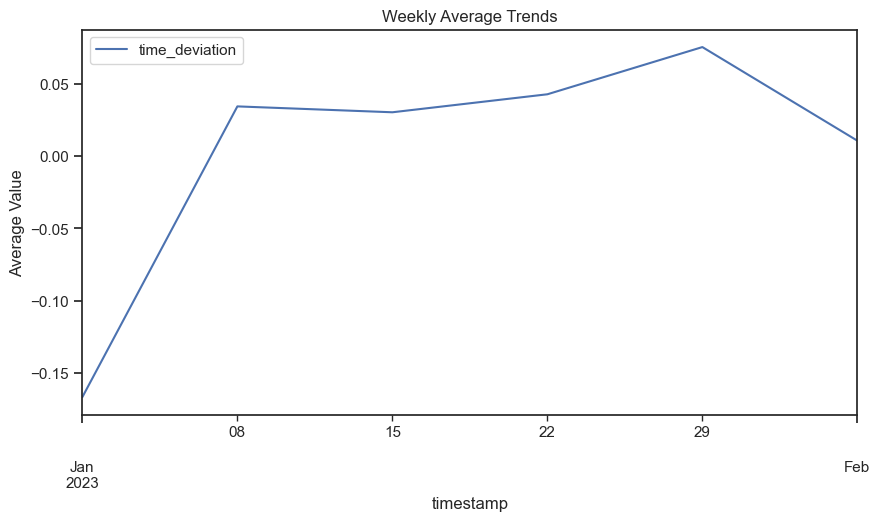

In [47]:
# Time series analysis of key metrics
weekly = df.resample('W', on='timestamp')[['time_deviation']].mean()
plt.figure(figsize=(10,5))
weekly.plot(title='Weekly Average Trends', figsize=(10,5))
plt.ylabel("Average Value")
plt.show()

## Performance Dataset

In [57]:
df_perform = pd.read_csv('construction_project_performance_dataset.csv')
df_perform.head()

,Timestamp,Sensor_ID,Temperature (°C),Humidity (%),Vibration_Level (Hz),Material_Usage (kg),Energy_Consumption (kWh),Worker_Count,Task_Progress (%),Safety_Incidents,Resource_Utilization (%),Risk_Score,Simulation_Accuracy (%),Optimization_Suggestion,Performance_Score
0,2023-01-01 00:00:00,Sensor_41,26.236204,42.418449,36.499916,674.330112,184.510419,18,0.086506,0,86.518381,32.607806,81.458493,Enhance Safety Measures,Exceptional
1,2023-01-01 00:01:00,Sensor_27,43.521429,39.974726,9.225600,513.363208,92.667999,79,0.162888,0,91.003107,98.116388,83.014287,Adjust Schedule,Exceptional
2,2023-01-01 00:02:00,Sensor_20,36.959818,30.569235,17.331985,968.048672,106.861651,33,0.241355,0,56.741970,85.460188,80.202505,Reallocate Workers,Exceptional
3,2023-01-01 00:03:00,Sensor_31,32.959755,56.436000,33.164032,297.080606,131.302008,99,0.267392,0,83.964498,14.811443,81.966505,Enhance Safety Measures,Exceptional
4,2023-01-01 00:04:00,Sensor_12,19.680559,48.597450,24.104467,629.070774,141.644000,74,0.321956,0,96.045832,20.387714,91.292507,Increase Machinery Efficiency,Exceptional


In [60]:
df_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 10000 non-null  object 
 1   Sensor_ID                 10000 non-null  object 
 2   Temperature (°C)          10000 non-null  float64
 3   Humidity (%)              10000 non-null  float64
 4   Vibration_Level (Hz)      10000 non-null  float64
 5   Material_Usage (kg)       10000 non-null  float64
 6   Energy_Consumption (kWh)  10000 non-null  float64
 7   Worker_Count              10000 non-null  int64  
 8   Task_Progress (%)         10000 non-null  float64
 9   Safety_Incidents          10000 non-null  int64  
 10  Resource_Utilization (%)  10000 non-null  float64
 11  Risk_Score                10000 non-null  float64
 12  Simulation_Accuracy (%)   10000 non-null  float64
 13  Optimization_Suggestion   10000 non-null  object 
 14  Perform

In [61]:
df_perform.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,10000,10000,2023-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sensor_ID,10000,100,Sensor_50,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature (°C),10000.0,NaN,NaN,NaN,29.824787,8.628904,15.000349,22.389866,29.775859,37.20019,44.99153
Humidity (%),10000.0,NaN,NaN,NaN,50.271793,17.357673,20.009465,35.236748,50.353807,65.388753,79.99549
Vibration_Level (Hz),10000.0,NaN,NaN,NaN,25.00252,14.338688,0.002406,12.687396,25.103405,37.233693,49.995049
Material_Usage (kg),10000.0,NaN,NaN,NaN,548.842045,260.095132,100.004983,322.171524,550.027215,772.404629,999.810435
Energy_Consumption (kWh),10000.0,NaN,NaN,NaN,273.588712,130.17788,50.007531,159.9225,272.172737,387.714665,499.987466
Worker_Count,10000.0,NaN,NaN,NaN,54.7568,26.209013,10.0,32.0,55.0,78.0,99.0
Task_Progress (%),10000.0,NaN,NaN,NaN,90.912372,22.873936,0.086506,100.0,100.0,100.0,100.0
Safety_Incidents,10000.0,NaN,NaN,NaN,0.0446,0.211696,0.0,0.0,0.0,0.0,2.0


In [65]:
columns_perform = df_perform.columns.tolist()
columns_perform

['Timestamp',
 'Sensor_ID',
 'Temperature (°C)',
 'Humidity (%)',
 'Vibration_Level (Hz)',
 'Material_Usage (kg)',
 'Energy_Consumption (kWh)',
 'Worker_Count',
 'Task_Progress (%)',
 'Safety_Incidents',
 'Resource_Utilization (%)',
 'Risk_Score',
 'Simulation_Accuracy (%)',
 'Optimization_Suggestion',
 'Performance_Score']

In [69]:
for col in columns_perform:
    col = col.lower()
    if col in columns:
        print(f"Column '{col}' is present in both datasets.√")
    else:
        print(f"Column '{col}' is unique to the performance dataset.✗")

Column 'timestamp' is present in both datasets.√
Column 'sensor_id' is unique to the performance dataset.✗
Column 'temperature (°c)' is unique to the performance dataset.✗
Column 'humidity (%)' is unique to the performance dataset.✗
Column 'vibration_level (hz)' is unique to the performance dataset.✗
Column 'material_usage (kg)' is unique to the performance dataset.✗
Column 'energy_consumption (kwh)' is unique to the performance dataset.✗
Column 'worker_count' is present in both datasets.√
Column 'task_progress (%)' is unique to the performance dataset.✗
Column 'safety_incidents' is present in both datasets.√
Column 'resource_utilization (%)' is unique to the performance dataset.✗
Column 'risk_score' is present in both datasets.√
Column 'simulation_accuracy (%)' is unique to the performance dataset.✗
Column 'optimization_suggestion' is present in both datasets.√
Column 'performance_score' is present in both datasets.√


In [59]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=[object]).columns.tolist()
print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['temperature', 'humidity', 'vibration_level', 'material_usage', 'machinery_status', 'worker_count', 'energy_consumption', 'task_progress', 'cost_deviation', 'time_deviation', 'safety_incidents', 'equipment_utilization_rate', 'material_shortage_alert', 'risk_score', 'simulation_deviation', 'update_frequency']
Categorical Columns: ['optimization_suggestion', 'performance_score', 'date']
